In [1]:
from Validation_statistic import validation, fine_tuning_threshold

In [2]:
from torch.utils.data import Dataset, DataLoader
from Crawling_Dataset import Crawling_Nomal_Dataset
import torch
import cv2 
import os
import numpy as np
from torchvision import transforms
import torch.utils.data as data
from facenet_pytorch import MTCNN, fixed_image_standardization, InceptionResnetV1
import math
import tqdm as tqdm
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from torchvision.transforms import Resize
# from cheff import bring

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [4]:
# test_path = '/opt/ml/data/celeb/cut_test' 
test_path = '/opt/ml/data/celeb/test'


In [5]:
transform = transforms.Compose([
        np.float32,
        transforms.ToTensor(),  # range [0, 255] -> [0.0, 1.0]
        Resize((160, 160)),
        fixed_image_standardization
    ])

In [6]:
test_dataset = Crawling_Nomal_Dataset(test_path, transforms=transform)
# test_dataset = Crawling_Nomal_Dataset(test_path, transforms=tr)
test_data_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2, drop_last=False)

In [7]:
from backbones import IResNet, IBasicBlock, get_model, iresnet50
# from backbones.backbone_jh import get_model
from backbones.Inception_resnet import InceptionResnetV1
import pandas as pd

In [8]:
model = get_model('facenet')

8631


In [9]:
model = InceptionResnetV1(
    classify=False,
    pretrained='vggface2'
).to(device)

8631


In [10]:
# model_path = '/opt/ml/Facial_verification/workspace/re_bat64_lr_7e-4_20230815_154634/final.pt'

In [11]:
# model.load_state_dict(torch.load(model_path))

In [12]:
# model = InceptionResnetV1(
#     classify=False,
#     pretrained='vggface2'
# ).to(device)

In [13]:
df,acc, recall, f1, precision = validation(model, test_data_loader, test_path,kde=True, distance_way=1)

0.2369 0.0495
0.397 0.0702
threshold :  0.28490000176429753
[[2217   83]
 [ 158  922]]
acc    :  0.928698224852071
recall :  0.8537037037037037
f1     :  0.8844124700239808
precision :  0.9174129353233831


<Axes: ylabel='Density'>

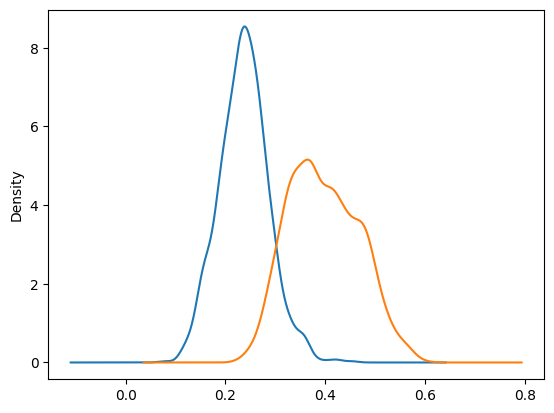

In [14]:
df[df.decision == "Yes"].distance.plot.kde()
df[df.decision == "No"].distance.plot.kde()